In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

c:\users\alice\miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("C:\\Users\\Alice\\Desktop\\SignalPro\\HW_2\\ERP.csv")
df.head()

,Unnamed: 0,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
0,0,1,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000
1,1,1,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234
2,2,1,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469
3,3,1,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703
4,4,1,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938


In [3]:
len(df)

497664

In [21]:
df1 = df[:1000]
y = np.array(1)
df1.head()

,Unnamed: 0,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
0,0,1,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000
1,1,1,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234
2,2,1,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469
3,3,1,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703
4,4,1,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938


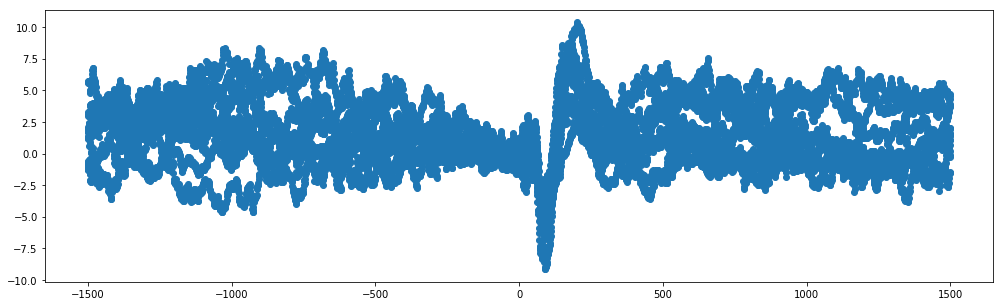

In [5]:
plot_frame_size = [17, 5]
plt.figure(figsize=plot_frame_size)
plt.scatter(df[ 'time_ms'][:24000], df[ 'Fz'][:24000])
plt.show()

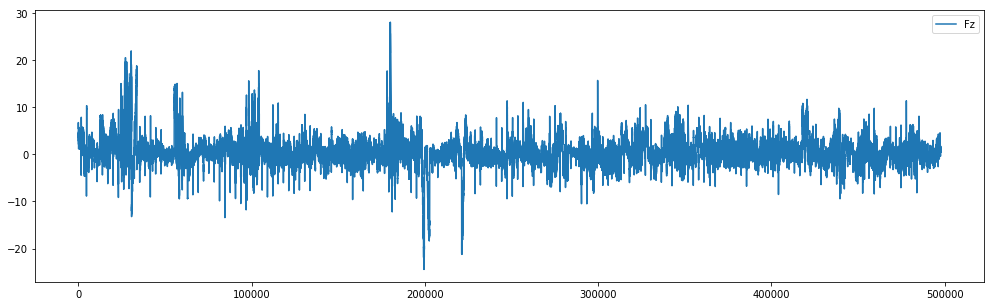

In [6]:
plot_frame_size = [17, 5]
df[[ 'Fz']].plot(figsize=plot_frame_size)

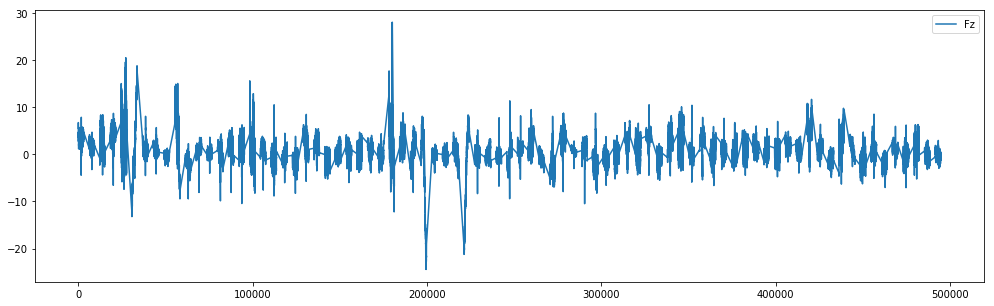

In [7]:
df[df.condition == 1][[ 'Fz']].plot(figsize=plot_frame_size)

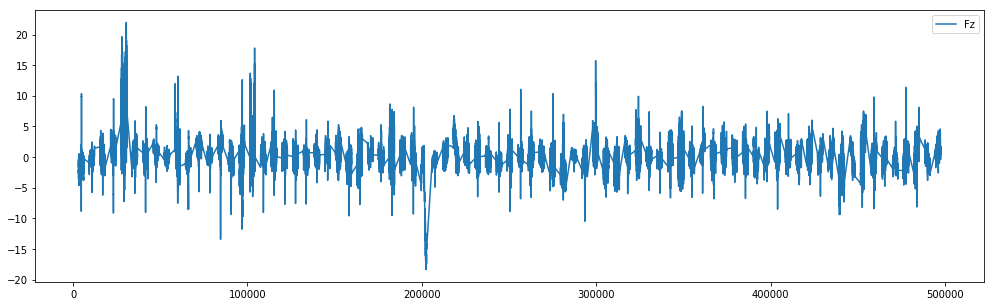

In [8]:
df[df.condition == 2][[ 'Fz']].plot(figsize=plot_frame_size)

Построить классификатор, который на основании временных рядов в колонках:
Fz, FCz, Cz, FC3, FC4, C3, C4, CP3, CP4;
Определяет признак из колонки condition

In [9]:
extraction_settings = ComprehensiveFCParameters()

In [10]:
X = extract_features(df1, 
                     column_id='subject', column_sort='time_ms',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute)

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:20<00:00,  3.45s/it]
 'condition__augmented_dickey_fuller__attr_"teststat"'
 'condition__autocorrelation__lag_0' 'condition__autocorrelation__lag_1'
 'condition__autocorrelation__lag_2' 'condition__autocorrelation__lag_3'
 'condition__autocorrelation__lag_4' 'condition__autocorrelation__lag_5'
 'condition__autocorrelation__lag_6' 'condition__autocorrelation__lag_7'
 'condition__autocorrelation__lag_8' 'condition__autocorrelation__lag_9'
 'condition__fft_aggregated__aggtype_"kurtosis"'
 'condition__fft_aggregated__aggtype_"skew"'
 'condition__friedrich_coefficients__m_3__r_30__coeff_0'
 'condition__friedrich_coefficients__m_3__r_30__coeff_1'
 'condition__friedrich_coefficients__m_3__r_30__coeff_2'
 'condition__friedrich_coefficients__m_3__r_30__coeff_3'
 'condition__max_langevin_fixed_point__m_3__r_30'
 'condition__partial_autocorrelation__lag_1'
 'condition__partial_autocorrelation__lag_2

In [11]:
X.head()

variable,C3__abs_energy,C3__absolute_sum_of_changes,"C3__agg_autocorrelation__f_agg_""mean""","C3__agg_autocorrelation__f_agg_""median""","C3__agg_autocorrelation__f_agg_""var""","C3__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","C3__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","C3__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","C3__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","C3__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,condition__time_reversal_asymmetry_statistic__lag_1,condition__time_reversal_asymmetry_statistic__lag_2,condition__time_reversal_asymmetry_statistic__lag_3,condition__value_count__value_-inf,condition__value_count__value_0,condition__value_count__value_1,condition__value_count__value_inf,condition__value_count__value_nan,condition__variance,condition__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,22883.042235,144.019193,0.665454,0.641791,0.028151,6.160394,-0.562071,-0.023432,0.003483,6.939442,...,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Columns: 8734 entries, C3__abs_energy to condition__variance_larger_than_standard_deviation
dtypes: float64(8734)
memory usage: 68.2 KB
